In [410]:
import importlib

import experiment
importlib.reload(experiment)
from experiment import *

importlib.reload(models)
from models import *

import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-white')
plt.rcParams['figure.figsize'] = [20, 10]

In [451]:
from pathlib import Path
path = Path('./protA_Dcp1_Edc3_final/')
fs = sorted(list(path.glob("*.csv")))

exp =Exp()
exp.load_bli_data(fs)

ref_path = Path('./protA_Dcp1_Edc3_final_refs/')
ref_fs = sorted(list(ref_path.glob("*.csv")))

refs =Exp()
refs.load_bli_data(ref_fs)

In [452]:
cs = [100, 100, 400, 400, 25, 50, 50, 200, 200, 0, 25, 0]
cs = [c*1e-9 for c in cs]

ref_cs = [25, 50, 100, 200, 400, 0]
ref_cs = [c*1e-9 for c in ref_cs]

for c, ds in zip(cs,exp.datasets):
    ds.steps[0].concentration = c

for c, ds in zip(ref_cs, refs.datasets):
    ds.steps[0].concentration = c


Exp.params is None. Fit and offset plots are not available


(<Figure size 1440x720 with 1 Axes>, <AxesSubplot:>)

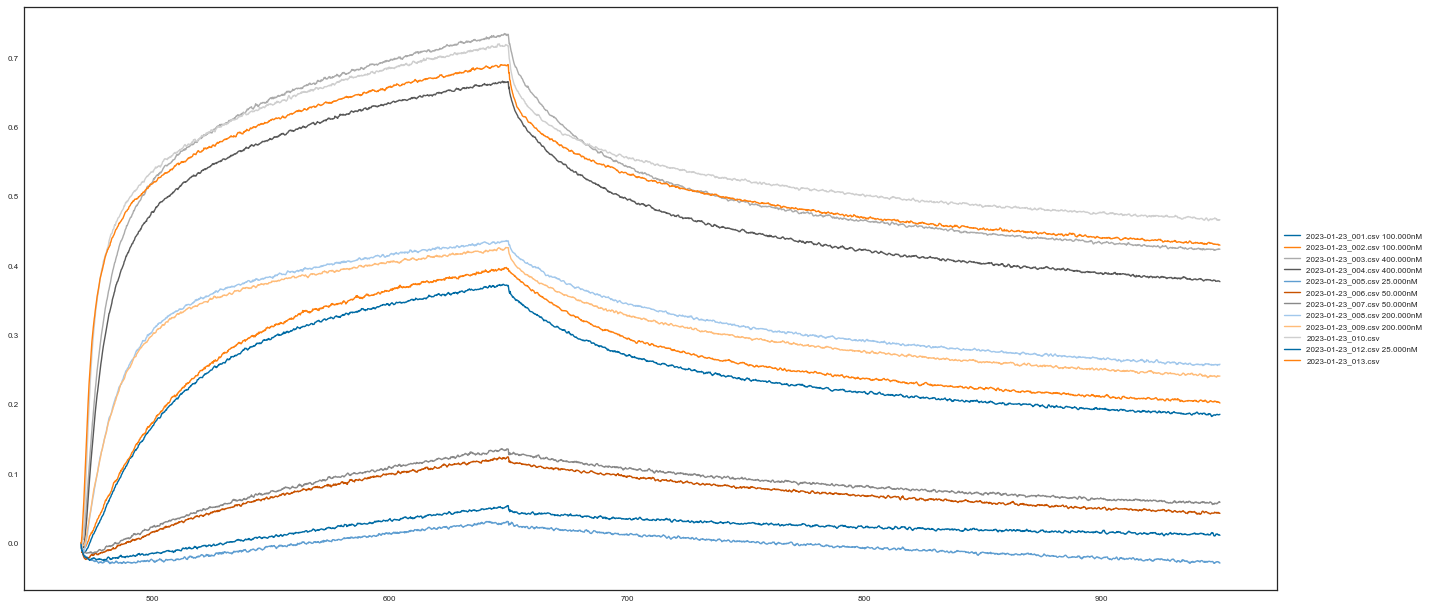

In [453]:
exp.interstep_correction()
exp.plot()

In [454]:
#loaded blank from all

blank = refs.datasets[-1].response #loaded blank
blank = blank[470*5:]

#subtract for no ligand refs
conc_to_ref = dict(zip(ref_cs, [ds.response for ds in refs]))
for ds in exp:
    if ds.steps[0].concentration in conc_to_ref:
        ref_response = conc_to_ref[ds.steps[0].concentration]
        ref_response = ref_response[~np.isnan(ref_response)]
        ref_response[-len(blank):] = ref_response[-len(blank):] - blank
        
        print(ds.name, ds.response.shape, ref_response.shape)
        ds.response[-len(ref_response):] = ds.response[-len(ref_response):] - ref_response
    else: 
        print(f"couldn't find refference for concentration {ds.steps[0].concentration}")


2023-01-23_001.csv (4750,) (2500,)
2023-01-23_002.csv (4750,) (2500,)
2023-01-23_003.csv (4750,) (2500,)
2023-01-23_004.csv (4750,) (2500,)
2023-01-23_005.csv (4750,) (2500,)
2023-01-23_006.csv (4750,) (2500,)
2023-01-23_007.csv (4750,) (2500,)
2023-01-23_008.csv (4750,) (2500,)
2023-01-23_009.csv (4750,) (2500,)
2023-01-23_010.csv (4750,) (4750,)
2023-01-23_012.csv (4750,) (2500,)
2023-01-23_013.csv (4750,) (4750,)


(<Figure size 1440x720 with 1 Axes>, <AxesSubplot:>)

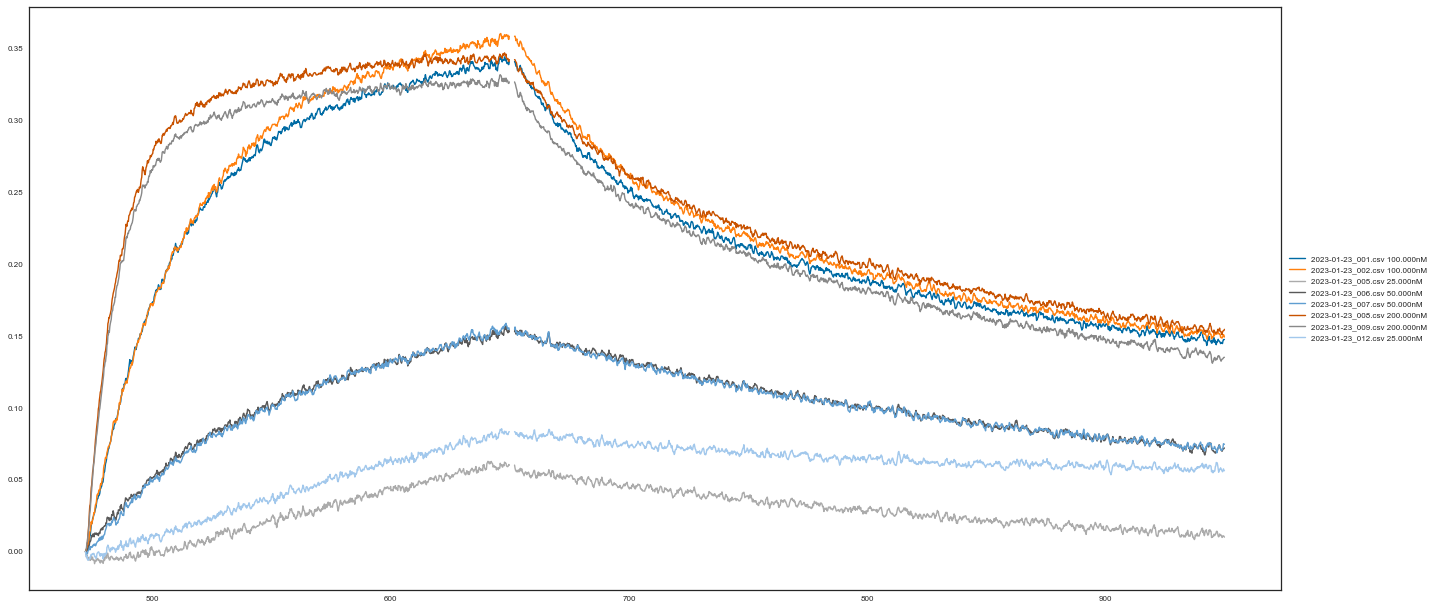

In [470]:
to_del = []
for ds in exp:
    if ds.steps[0].concentration>300e-9:
        to_del.append(ds.index)

for idx in to_del:
    del exp.datasets[idx]

exp.interstep_correction()
exp.plot()

Nan and inf are not valid responses. Some values in dataset 0 are not finite. LMFIT is set to omit.
Nan and inf are not valid responses. Some values in dataset 1 are not finite. LMFIT is set to omit.
Dataset 2 will be ommited. It does not contain any step with concentration>0.
Nan and inf are not valid responses. Some values in dataset 2 are not finite. LMFIT is set to omit.
Dataset 3 will be ommited. It does not contain any step with concentration>0.
Nan and inf are not valid responses. Some values in dataset 3 are not finite. LMFIT is set to omit.
Nan and inf are not valid responses. Some values in dataset 4 are not finite. LMFIT is set to omit.
Nan and inf are not valid responses. Some values in dataset 5 are not finite. LMFIT is set to omit.
Nan and inf are not valid responses. Some values in dataset 6 are not finite. LMFIT is set to omit.
Nan and inf are not valid responses. Some values in dataset 7 are not finite. LMFIT is set to omit.
Nan and inf are not valid responses. Some va

(<Figure size 1440x720 with 1 Axes>,
 <AxesSubplot:title={'center':'ka: 2.3E+05 kd: 2.3E-03 ymax: 1.2E+01 ymax: 1.4E-01 ymax: 1.5E-01 ymax: 2.0E-01 ymax: 2.1E-01 ymax: 3.4E-01 ymax: 3.5E-01 ymax: 3.8E-01 ymax: 4.1E-01 ymax: 4.9E+00 ymax: 6.9E+01 ymax: 7.2E+01'}>)

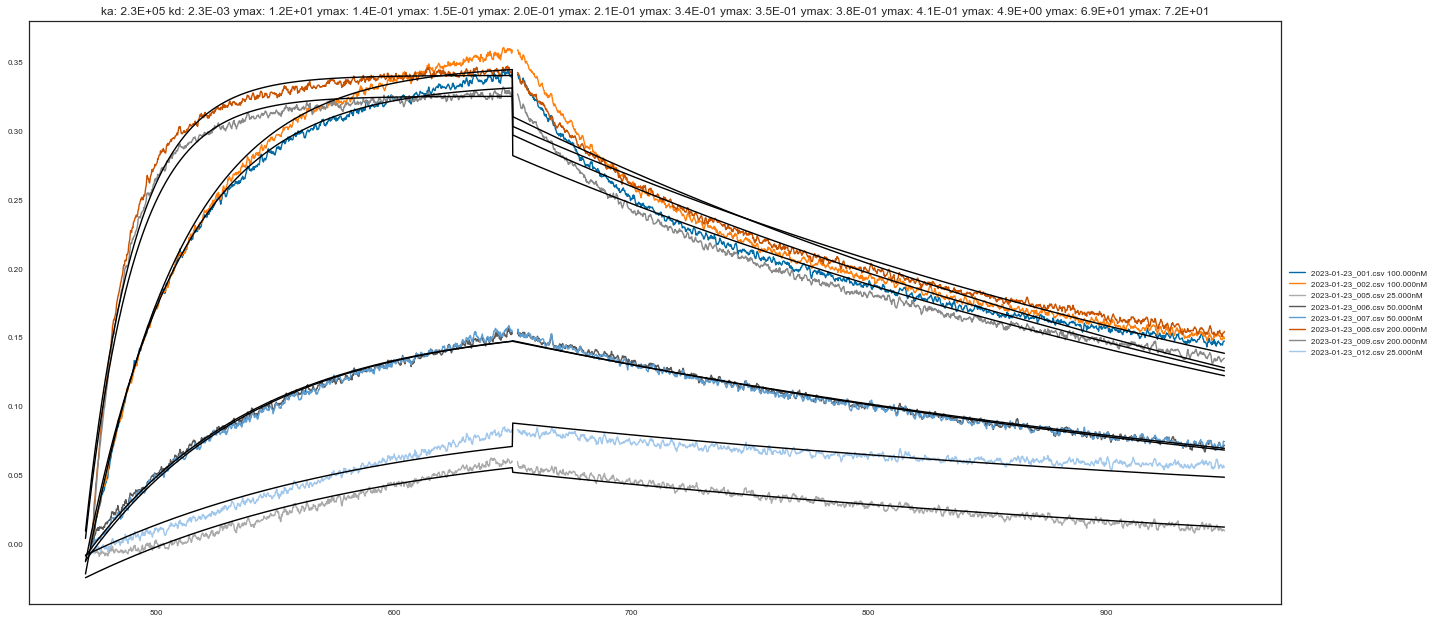

In [482]:
exp.model = One_to_one()
exp.create_params(offsets=True)
exp.fit_params()
exp.plot(fit=True)

Nan and inf are not valid responses. Some values in dataset 0 are not finite. LMFIT is set to omit.
Nan and inf are not valid responses. Some values in dataset 1 are not finite. LMFIT is set to omit.
Dataset 2 will be ommited. It does not contain any step with concentration>0.
Nan and inf are not valid responses. Some values in dataset 2 are not finite. LMFIT is set to omit.
Dataset 3 will be ommited. It does not contain any step with concentration>0.
Nan and inf are not valid responses. Some values in dataset 3 are not finite. LMFIT is set to omit.
Nan and inf are not valid responses. Some values in dataset 4 are not finite. LMFIT is set to omit.
Nan and inf are not valid responses. Some values in dataset 5 are not finite. LMFIT is set to omit.
Nan and inf are not valid responses. Some values in dataset 6 are not finite. LMFIT is set to omit.
Nan and inf are not valid responses. Some values in dataset 7 are not finite. LMFIT is set to omit.
Nan and inf are not valid responses. Some va

(<Figure size 1440x720 with 1 Axes>,
 <AxesSubplot:title={'center':'ka1: 1.2E+05 ka2: 7.2E-02 kd1: 1.4E-02 kd2: 2.0E-03 ymax: 1.0E-01 ymax: 1.3E+00 ymax: 1.5E-01 ymax: 2.0E-01 ymax: 2.1E-01 ymax: 2.7E-01 ymax: 2.8E-01 ymax: 3.9E-01 ymax: 4.1E-01 ymax: 4.7E-01 ymax: 5.0E-01 ymax: 7.0E-02'}>)

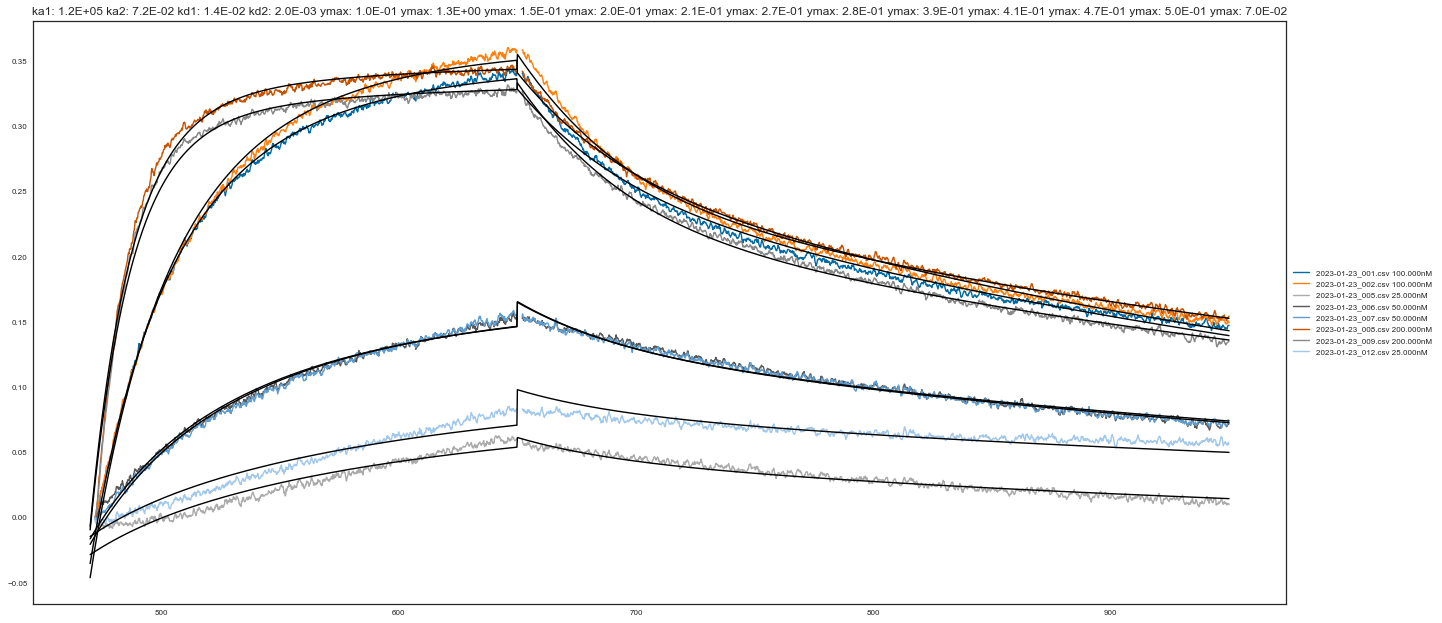

In [483]:
exp.model = Bivalent_analyte()
exp.crop(2)
exp.create_params(offsets=True)
exp.fit_params()
exp.plot(fit=True, correct_offsets=0)

Nan and inf are not valid responses. Some values in dataset 0 are not finite. LMFIT is set to omit.
Nan and inf are not valid responses. Some values in dataset 1 are not finite. LMFIT is set to omit.
Dataset 2 will be ommited. It does not contain any step with concentration>0.
Nan and inf are not valid responses. Some values in dataset 2 are not finite. LMFIT is set to omit.
Dataset 3 will be ommited. It does not contain any step with concentration>0.
Nan and inf are not valid responses. Some values in dataset 3 are not finite. LMFIT is set to omit.
Nan and inf are not valid responses. Some values in dataset 4 are not finite. LMFIT is set to omit.
Nan and inf are not valid responses. Some values in dataset 5 are not finite. LMFIT is set to omit.
Nan and inf are not valid responses. Some values in dataset 6 are not finite. LMFIT is set to omit.
Nan and inf are not valid responses. Some values in dataset 7 are not finite. LMFIT is set to omit.
Nan and inf are not valid responses. Some va

(<Figure size 1440x720 with 1 Axes>,
 <AxesSubplot:title={'center':'ka1: 1.4E+05 ka2: 2.9E+04 kd1: 2.9E-03 kd2: 5.0E-02 ymax1: 1.2E-01 ymax1: 1.5E+00 ymax1: 1.8E-01 ymax1: 2.1E-01 ymax1: 2.2E-01 ymax1: 2.3E-01 ymax1: 2.6E-03 ymax1: 3.0E-01 ymax1: 3.2E-01 ymax1: 3.3E-01 ymax2: 1.0E+00 ymax2: 1.0E-12 ymax2: 1.1E+00 ymax2: 1.6E+00 ymax2: 1.7E+00 ymax2: 2.0E+00 ymax2: 2.0E-02 ymax2: 2.4E+00 ymax2: 2.9E-01 ymax2: 3.2E-01 ymax2: 9.6E-01 ymax2: 9.7E-01'}>)

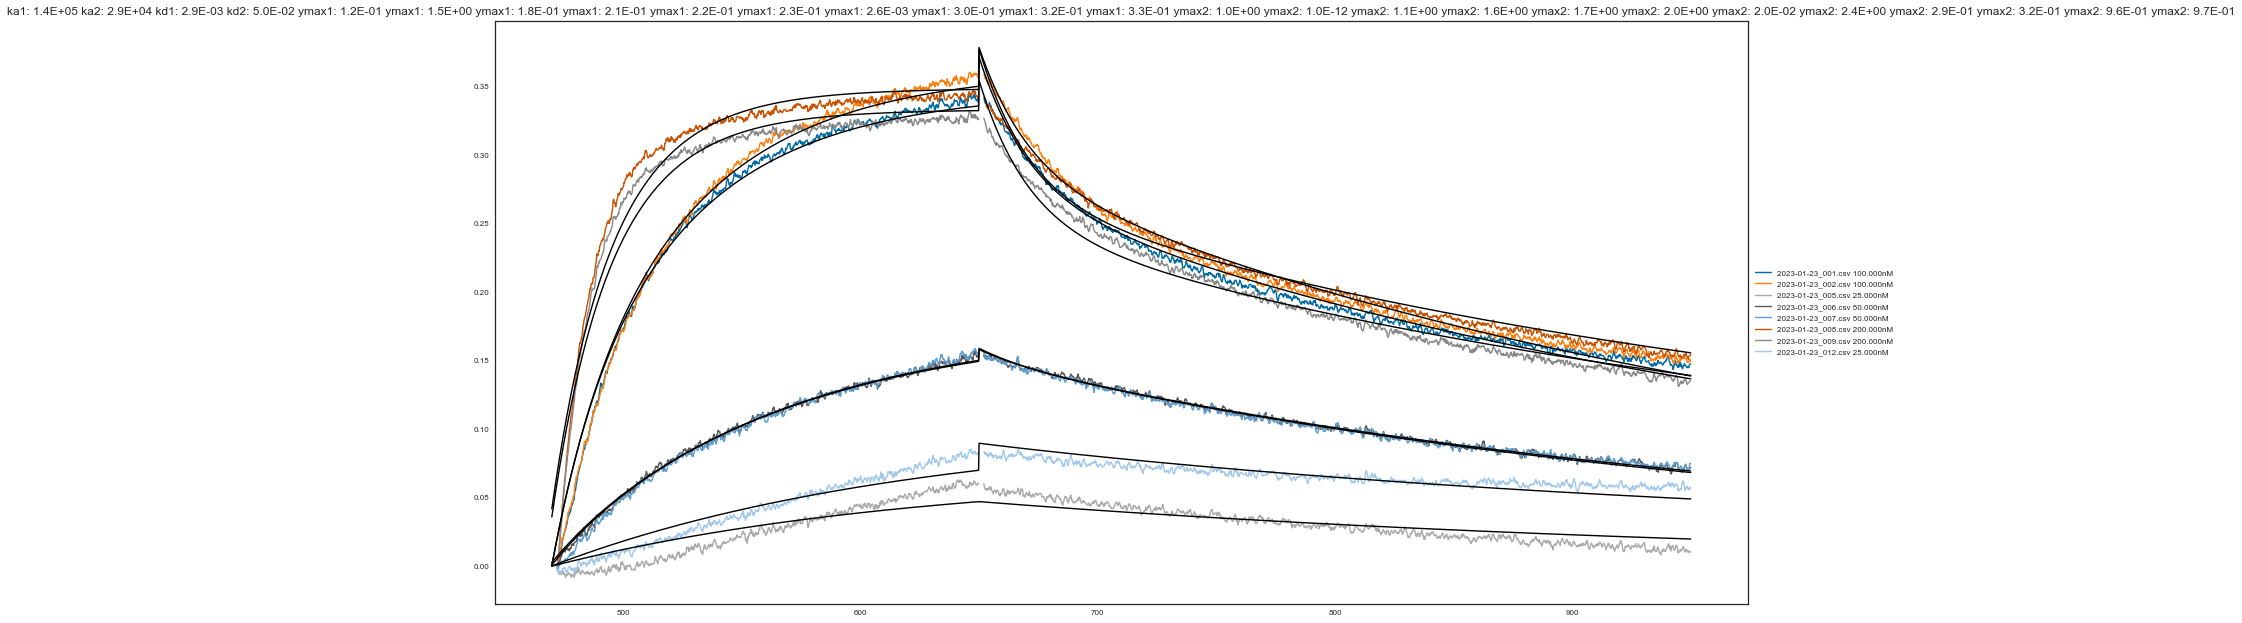

In [484]:
exp.model = Heterogeneous_ligand()
exp.create_params(offsets=True)
exp.fit_params()
exp.plot(fit=True, correct_offsets=0)

Nan and inf are not valid responses. Some values in dataset 0 are not finite. LMFIT is set to omit.
Nan and inf are not valid responses. Some values in dataset 1 are not finite. LMFIT is set to omit.
Dataset 2 will be ommited. It does not contain any step with concentration>0.
Nan and inf are not valid responses. Some values in dataset 2 are not finite. LMFIT is set to omit.
Dataset 3 will be ommited. It does not contain any step with concentration>0.
Nan and inf are not valid responses. Some values in dataset 3 are not finite. LMFIT is set to omit.
Nan and inf are not valid responses. Some values in dataset 4 are not finite. LMFIT is set to omit.
Nan and inf are not valid responses. Some values in dataset 5 are not finite. LMFIT is set to omit.
Nan and inf are not valid responses. Some values in dataset 6 are not finite. LMFIT is set to omit.
Nan and inf are not valid responses. Some values in dataset 7 are not finite. LMFIT is set to omit.
Nan and inf are not valid responses. Some va

(<Figure size 1440x720 with 1 Axes>,
 <AxesSubplot:title={'center':'ka1: 2.5E+05 ka2: 5.5E-03 kd1: 1.1E-02 kd2: 2.1E-03 ymax: 2.0E-01 ymax: 2.7E-01 ymax: 2.8E-01 ymax: 4.0E-01 ymax: 4.1E-01 ymax: 4.8E-01 ymax: 5.1E-01 ymax: 5.5E+00 ymax: 6.2E+01 ymax: 6.3E-01 ymax: 8.0E+00'}>)

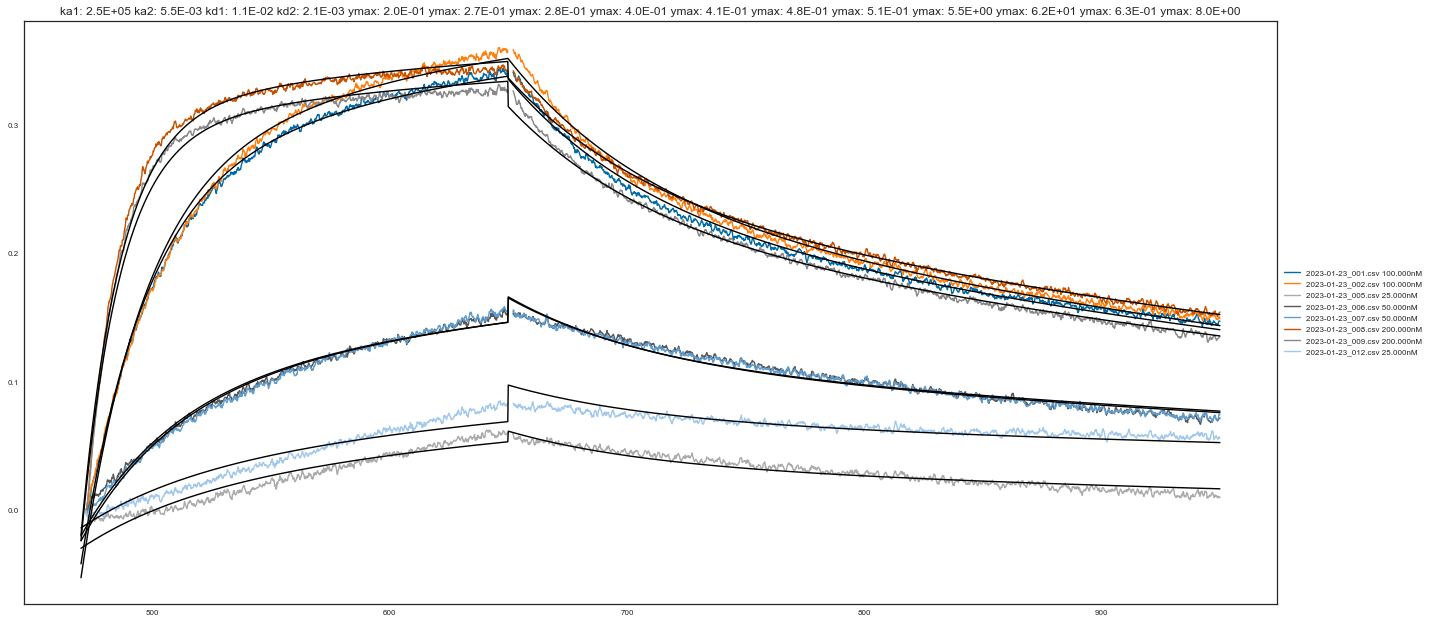

In [485]:
exp.model = Two_state()
exp.create_params(offsets=True)
exp.fit_params()
exp.plot(fit=True, correct_offsets=0)

In [464]:
class Triple_sites:

#note: that this model assumes that the binding of the analyte to one subunit of the ligand 
# does not affect the binding of the analyte to other subunits of the ligand, and also 
# assumes that the binding site on each subunit is independent.

  name = 'Triple_sites'

  no_ODEs = 3
  signal_components = 3

  def __init__(self):
    self.params_definitions = {
      'ka1' : Parameter(name = 'ka1', vary = True, value = 1e+04, min = 1e+01, max = 1e+07, user_data = {'type': 'global', 'units': 'M-1s-1'}),
      'kd1' : Parameter(name = 'kd1', vary = True, value = 1e-02, min = 1e-06, max = 1e-01, user_data = {'type': 'global', 'units': 's-1'}),
      'ka2' : Parameter(name = 'ka2', vary = True, value = 1e+04, min = 1e-07, max = 1e+07, user_data = {'type': 'global', 'units': 'M-1s-1'}),
      'kd2' : Parameter(name = 'kd2', vary = True, value = 1e-02, min = 1e-07, max = 1e+07, user_data = {'type': 'global', 'units': 's-1'}),
      'ka3' : Parameter(name = 'ka3', vary = True, value = 1e+04, min = 1e-07, max = 1e+07, user_data = {'type': 'global', 'units': 'M-1s-1'}),
      'kd3' : Parameter(name = 'kd3', vary = True, value = 1e-02, min = 1e-07, max = 1e+07, user_data = {'type': 'global', 'units': 's-1'}),
      'kt' : Parameter(name = 'kt', vary = True, value = 1e+07, min = 1e+01, max = 1e+12, user_data = {'type': 'global', 'units': 'RU M-1s-1'}),
      'ymax1' : Parameter(name = 'ymax1', vary = True, value = 1, min = 1e-12, max = 1000, user_data = {'type': 'local_dataset', 'units': 'RU'}),
      'ymax2' : Parameter(name = 'ymax2', vary = True, value = 1, min = 1e-12, max = 1000, user_data = {'type': 'local_dataset', 'units': 'RU'}),
      'ymax3' : Parameter(name = 'ymax3', vary = True, value = 1, min = 1e-12, max = 1000, user_data = {'type': 'local_dataset', 'units': 'RU'}),
      'offset' : Parameter(name = 'offset', vary = True, value = -1, min = 0, max = 1, user_data = {'type': 'local_step', 'units': 'RU'}),
    }

  def __repr__(self):
    return self.name

  def ydot(self, t, y, params, c0, ds_index):
    ka1 = params['ka1'].value
    kd1 = params['kd1'].value
    ka2 = params['ka2'].value
    kd2 = params['kd2'].value
    ka3 = params['ka3'].value
    kd3 = params['kd3'].value
    try:
      ymax1 = params[f'ymax1_ds{ds_index}'].value
      ymax2 = params[f'ymax2_ds{ds_index}'].value
      ymax3 = params[f'ymax3_ds{ds_index}'].value
    except:
      ymax1 = params[f'ymax1'].value
      ymax2 = params[f'ymax2'].value
      ymax3 = params[f'ymax3'].value

    if 'kt' in params: 
      include_mtl = True
      kt = params['kt'].value
    else: 
      include_mtl = False
    Abulk = c0


    

    [L1A, L2A, L3A] = y
    L1 = ymax1 - L1A
    L2 = ymax2 - L2A
    L3 = ymax3 - L3A
    
    dL1A = ka1*L1*Abulk - kd1*L1A
    dL2A = ka2*L2*Abulk - kd2*L2A
    dL3A = ka3*L3*Abulk - kd3*L3A
    
    return [dL1A, dL2A, dL3A]

Nan and inf are not valid responses. Some values in dataset 0 are not finite. LMFIT is set to omit.
Nan and inf are not valid responses. Some values in dataset 1 are not finite. LMFIT is set to omit.
Dataset 2 will be ommited. It does not contain any step with concentration>0.
Nan and inf are not valid responses. Some values in dataset 2 are not finite. LMFIT is set to omit.
Dataset 3 will be ommited. It does not contain any step with concentration>0.
Nan and inf are not valid responses. Some values in dataset 3 are not finite. LMFIT is set to omit.
Nan and inf are not valid responses. Some values in dataset 4 are not finite. LMFIT is set to omit.
Nan and inf are not valid responses. Some values in dataset 5 are not finite. LMFIT is set to omit.
Nan and inf are not valid responses. Some values in dataset 6 are not finite. LMFIT is set to omit.
Nan and inf are not valid responses. Some values in dataset 7 are not finite. LMFIT is set to omit.
Nan and inf are not valid responses. Some va

(<Figure size 1440x720 with 1 Axes>,
 <AxesSubplot:title={'center':'ka1: 9.8E+03 ka2: 9.8E+03 ka3: 9.8E+03 kd1: 8.6E-03 kd2: 3.3E-02 kd3: 2.6E-02 ymax1: 1.0E+00 ymax1: 1.2E+00 ymax1: 1.3E+00 ymax1: 1.4E+00 ymax1: 2.0E+00 ymax1: 2.1E+00 ymax1: 2.6E+00 ymax1: 2.6E-01 ymax1: 2.7E+00 ymax1: 4.8E+00 ymax1: 9.6E-01 ymax1: 9.8E-01 ymax2: 1.1E+00 ymax2: 1.2E+00 ymax2: 1.3E+00 ymax2: 1.5E+00 ymax2: 1.6E+00 ymax2: 1.9E+00 ymax2: 2.0E+00 ymax2: 2.6E+00 ymax2: 2.8E+00 ymax2: 3.0E+00 ymax2: 9.1E-01 ymax3: 1.1E+00 ymax3: 1.2E+00 ymax3: 1.4E+00 ymax3: 1.6E+00 ymax3: 1.8E+00 ymax3: 2.0E+00 ymax3: 2.1E+00 ymax3: 2.2E+00 ymax3: 3.3E+00 ymax3: 6.6E-01 ymax3: 9.5E-01'}>)

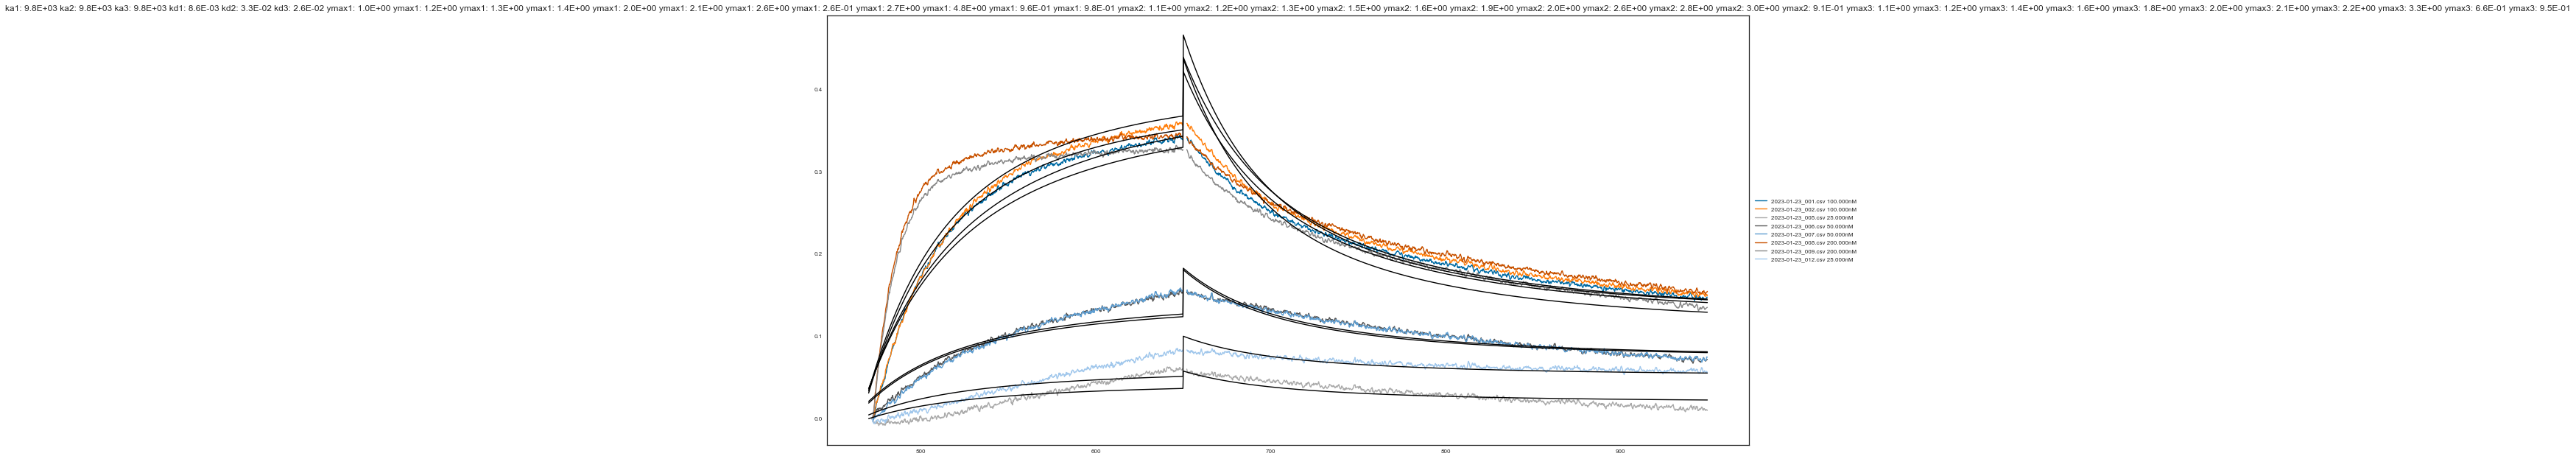

In [486]:
exp.model = Triple_sites()
exp.create_params(offsets=True)
exp.fit_params()
exp.plot(fit=True, correct_offsets=0)

In [487]:
class Trivalent_ligand:
  name = 'trivalent_ligand'

  no_ODEs = 3
  signal_components = 3

  def __init__(self) -> None:
    self.params_definitions = {
      'ka1' : Parameter(name = 'ka1', vary = True, value = 1e+04, min = 1e+01, max = 1e+07, user_data = {'type': 'global', 'units': 'M-1s-1'}),
      'kd1' : Parameter(name = 'kd1', vary = True, value = 1e-02, min = 1e-06, max = 1e-01, user_data = {'type': 'global', 'units': 's-1'}),
      'ka2' : Parameter(name = 'ka2', vary = True, value = 1e-02, min = 1e-07, max = 1e+07, user_data = {'type': 'global', 'units': ''}),
      'kd2' : Parameter(name = 'kd2', vary = True, value = 1e-02, min = 1e-07, max = 1e+07, user_data = {'type': 'global', 'units': ''}),
      'ka3' : Parameter(name = 'ka3', vary = True, value = 1e-02, min = 1e-07, max = 1e+07, user_data = {'type': 'global', 'units': ''}),
      'kd3' : Parameter(name = 'kd3', vary = True, value = 1e-02, min = 1e-07, max = 1e+07, user_data = {'type': 'global', 'units': ''}),
      'kt' : Parameter(name = 'kt', vary = True, value = 1e+07, min = 1e+01, max = 1e+12, user_data = {'type': 'global', 'units': 'RU M-1s-1'}),
      'ymax' : Parameter(name = 'ymax', vary = True, value = 1, min = 0, max = 1000, user_data = {'type': 'local_dataset', 'units': 'RU'}),
      'offset' : Parameter(name = 'offset', vary = True, value = 0, min = -1000, max = 1000, user_data = {'type': 'local_step', 'units': 'RU'}),
    }
  def __repr__(self):
    return self.name

  def ydot(self, t, y, params, c0, ds_index):
    ka1 = params['ka1'].value
    kd1 = params['kd1'].value
    ka2 = params['ka2'].value
    kd2 = params['kd2'].value
    ka3 = params['ka3'].value
    kd3 = params['kd3'].value

    try:
        ymax = params[f'ymax_ds{ds_index}'].value
    except:
        ymax = params['ymax'].value
    
    [LA, LAA, LAAA] = y
    L = ymax - LA - LAA - LAAA
    Abulk = c0

    dLA = ka1*L*Abulk - kd1*LA - ka2*LA*Abulk + kd2*LAA 
    dLAA = ka2*LA*Abulk - kd2*LAA -ka3*LAA*Abulk + kd3*LAAA
    dLAAA = ka3*LAA*Abulk - kd3*LAAA

    
    return [dLA, dLAA, dLAAA]

Nan and inf are not valid responses. Some values in dataset 0 are not finite. LMFIT is set to omit.
Nan and inf are not valid responses. Some values in dataset 1 are not finite. LMFIT is set to omit.
Dataset 2 will be ommited. It does not contain any step with concentration>0.
Nan and inf are not valid responses. Some values in dataset 2 are not finite. LMFIT is set to omit.
Dataset 3 will be ommited. It does not contain any step with concentration>0.
Nan and inf are not valid responses. Some values in dataset 3 are not finite. LMFIT is set to omit.
Nan and inf are not valid responses. Some values in dataset 4 are not finite. LMFIT is set to omit.
Nan and inf are not valid responses. Some values in dataset 5 are not finite. LMFIT is set to omit.
Nan and inf are not valid responses. Some values in dataset 6 are not finite. LMFIT is set to omit.
Nan and inf are not valid responses. Some values in dataset 7 are not finite. LMFIT is set to omit.
Nan and inf are not valid responses. Some va

(<Figure size 1440x720 with 1 Axes>,
 <AxesSubplot:title={'center':'ka1: 2.3E+05 ka2: 6.9E+00 ka3: 4.7E+04 kd1: 2.3E-03 kd2: 2.6E+04 kd3: 1.2E+00 ymax: 1.0E+00 ymax: 1.4E-01 ymax: 1.5E-01 ymax: 2.0E-01 ymax: 2.1E-01 ymax: 3.4E-01 ymax: 3.5E-01 ymax: 3.8E-01 ymax: 4.1E-01'}>)

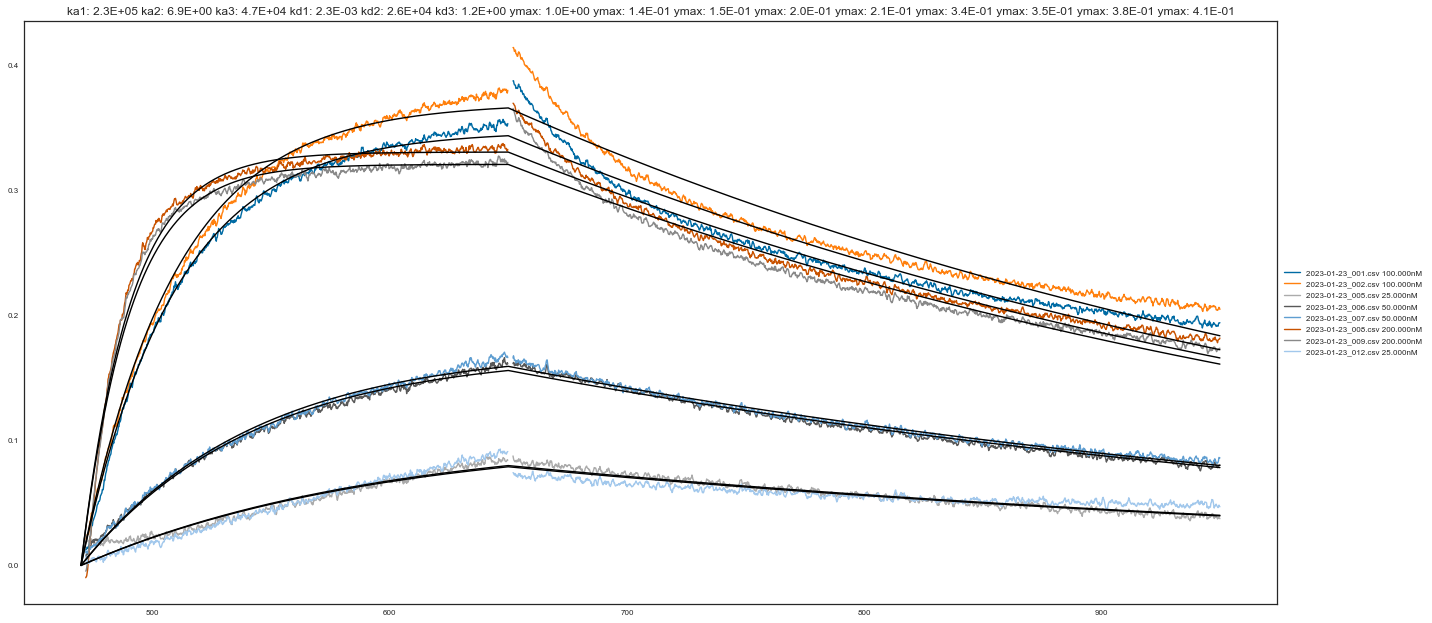

In [488]:
exp.model = Trivalent_ligand()
exp.create_params(offsets=True)
exp.fit_params()
exp.plot(fit=True, correct_offsets=True)

In [494]:
class Multiple_binding:
  name = 'Multiple_binding'

  no_ODEs = 5
  signal_components = 5

  def __init__(self) -> None:
    self.params_definitions = {
      'ka1' : Parameter(name = 'ka1', vary = True, value = 1e+04, min = 1e+01, max = 1e+07, user_data = {'type': 'global', 'units': 'M-1s-1'}),
      'kd1' : Parameter(name = 'kd1', vary = True, value = 1e-02, min = 1e-06, max = 1e-01, user_data = {'type': 'global', 'units': 's-1'}),
      'ka2' : Parameter(name = 'ka2', vary = True, value = 1e-02, min = 1e-07, max = 1e+07, user_data = {'type': 'global', 'units': ''}),
      'kd2' : Parameter(name = 'kd2', vary = True, value = 1e-02, min = 1e-07, max = 1e+07, user_data = {'type': 'global', 'units': ''}),
      'ka3' : Parameter(name = 'ka3', vary = True, value = 1e-02, min = 1e-07, max = 1e+07, user_data = {'type': 'global', 'units': ''}),
      'kd3' : Parameter(name = 'kd3', vary = True, value = 1e-02, min = 1e-07, max = 1e+07, user_data = {'type': 'global', 'units': ''}),
      'ka4' : Parameter(name = 'ka4', vary = True, value = 1e-02, min = 1e-07, max = 1e+07, user_data = {'type': 'global', 'units': ''}),
      'kd4' : Parameter(name = 'kd4', vary = True, value = 1e-02, min = 1e-07, max = 1e+07, user_data = {'type': 'global', 'units': ''}),
      'ka5' : Parameter(name = 'ka5', vary = True, value = 1e-02, min = 1e-07, max = 1e+07, user_data = {'type': 'global', 'units': ''}),
      'kd5' : Parameter(name = 'kd5', vary = True, value = 1e-02, min = 1e-07, max = 1e+07, user_data = {'type': 'global', 'units': ''}),
      'ka6' : Parameter(name = 'ka6', vary = True, value = 1e-02, min = 1e-07, max = 1e+07, user_data = {'type': 'global', 'units': ''}),
      'kd6' : Parameter(name = 'kd6', vary = True, value = 1e-02, min = 1e-07, max = 1e+07, user_data = {'type': 'global', 'units': ''}),

      'kt' : Parameter(name = 'kt', vary = True, value = 1e+07, min = 1e+01, max = 1e+12, user_data = {'type': 'global', 'units': 'RU M-1s-1'}),
      'ymax' : Parameter(name = 'ymax', vary = True, value = 1, min = 0, max = 1000, user_data = {'type': 'global', 'units': 'RU'}),
      'offset' : Parameter(name = 'offset', vary = True, value = 0, min = -1000, max = 1000, user_data = {'type': 'local_step', 'units': 'RU'}),
    }
  def __repr__(self):
    return self.name

  def ydot(self, t, y, params, c0, ds_index):
    ka1 = params['ka1'].value
    kd1 = params['kd1'].value
    ka2 = params['ka2'].value
    kd2 = params['kd2'].value
    ka3 = params['ka3'].value
    kd3 = params['kd3'].value
    ka4 = params['ka4'].value
    kd4 = params['kd4'].value
    ka5 = params['ka5'].value
    kd5 = params['kd5'].value
    ka6 = params['ka6'].value
    kd6 = params['kd6'].value

    try:
        ymax = params[f'ymax_ds{ds_index}'].value
    except:
        ymax = params['ymax'].value
    
    [LA, LAA, LAAA, LA2, LAA2] = y
    L = ymax - LA - LAA - LAAA - LA2 - LAA2
    Abulk = c0

    dLA = ka1*L*Abulk - kd1*LA - (ka2*LA - kd2*LA2) - (ka3*LA*Abulk - kd3*LAA) 
    dLA2 = ka2*LA - kd2*LA2 - ka5*LA2*Abulk + kd5*LAA2
    dLAA = ka3*LA*Abulk - kd3*LAA - ka4*LAA + kd4*LAA2 - ka6*LAA*Abulk + kd6*LAAA
    dLAA2 = ka5*LA2*Abulk - kd5*LAA2 + ka4*LAA*Abulk - ka4*LAA2
    dLAAA = ka6*LAA*Abulk - kd6*LAAA

    return [dLA, dLAA, dLAAA, dLA2, dLAA2]

Nan and inf are not valid responses. Some values in dataset 0 are not finite. LMFIT is set to omit.
Nan and inf are not valid responses. Some values in dataset 1 are not finite. LMFIT is set to omit.
Dataset 2 will be ommited. It does not contain any step with concentration>0.
Nan and inf are not valid responses. Some values in dataset 2 are not finite. LMFIT is set to omit.
Dataset 3 will be ommited. It does not contain any step with concentration>0.
Nan and inf are not valid responses. Some values in dataset 3 are not finite. LMFIT is set to omit.
Nan and inf are not valid responses. Some values in dataset 4 are not finite. LMFIT is set to omit.
Nan and inf are not valid responses. Some values in dataset 5 are not finite. LMFIT is set to omit.
Nan and inf are not valid responses. Some values in dataset 6 are not finite. LMFIT is set to omit.
Nan and inf are not valid responses. Some values in dataset 7 are not finite. LMFIT is set to omit.
Nan and inf are not valid responses. Some va

(<Figure size 1440x720 with 1 Axes>,
 <AxesSubplot:title={'center':'ka1: 1.1E+04 ka2: 1.5E+01 ka3: 5.7E+02 ka4: 5.8E+02 ka5: 3.1E+02 ka6: 2.3E+02 kd1: 1.1E-02 kd2: 1.2E+01 kd3: 1.9E+01 kd4: 3.1E+02 kd5: 2.2E+02 kd6: 1.6E+02 ymax: 2.1E+00'}>)

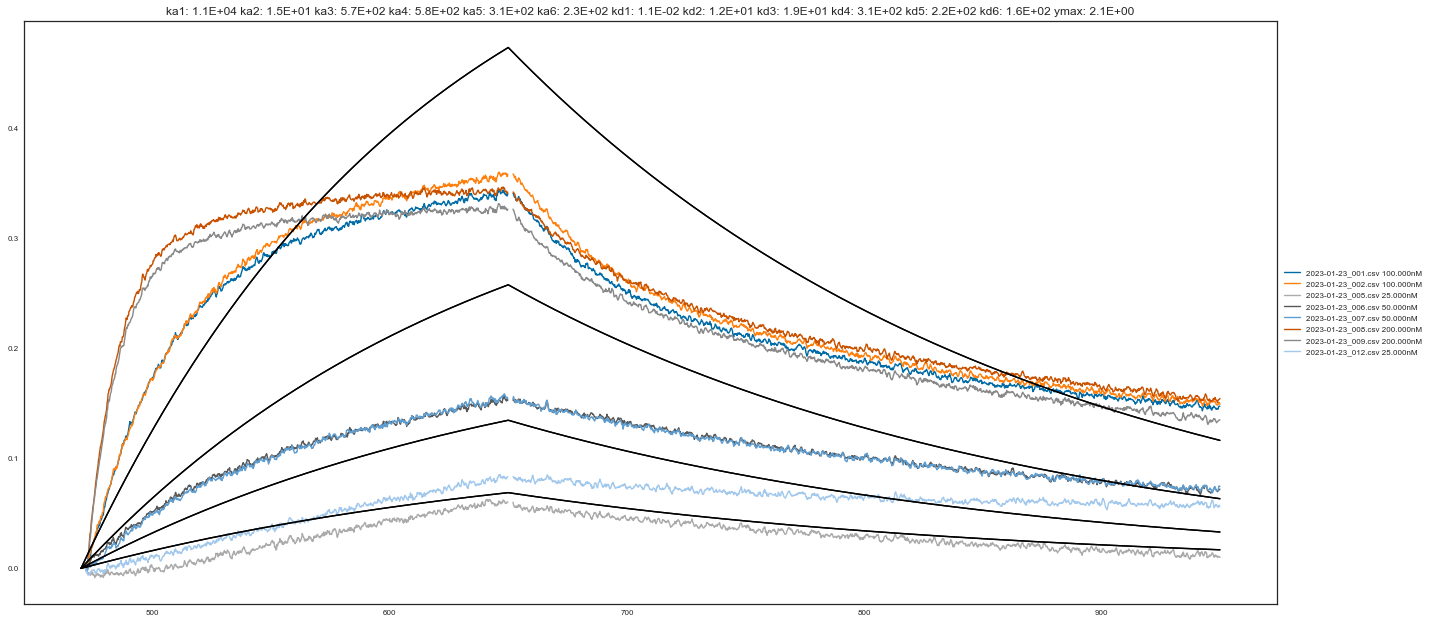

In [495]:
exp.model = Multiple_binding()
exp.create_params(offsets=0)
exp.fit_params()
exp.plot(fit=True, correct_offsets=0)

In [496]:
exp.params

name,value,standard error,relative error,initial value,min,max,vary
ka1,11292.3319,22460.0081,(198.90%),10000.0,10.0000000,10000000.0,True
kd1,0.01067869,0.52746514,(4939.42%),0.01,1.0000e-06,0.10000000,True
ka2,14.9087962,733.752477,(4921.61%),0.01,1.0000e-07,10000000.0,True
kd2,11.6369204,868.638911,(7464.51%),0.01,1.0000e-07,10000000.0,True
ka3,568.971318,33684.0096,(5920.16%),0.01,1.0000e-07,10000000.0,True
kd3,19.0499861,813.002684,(4267.73%),0.01,1.0000e-07,10000000.0,True
ka4,575.455134,61947.3813,(10764.94%),0.01,1.0000e-07,10000000.0,True
kd4,314.030757,28951.5021,(9219.32%),0.01,1.0000e-07,10000000.0,True
ka5,312.868519,33383.2813,(10670.07%),0.01,1.0000e-07,10000000.0,True
kd5,223.211786,20751.8454,(9296.93%),0.01,1.0000e-07,10000000.0,True


In [489]:
class Bivalent_ligand:
  name = 'Bivalent_ligand'

  no_ODEs = 2
  signal_components = 2

  def __init__(self) -> None:
    self.params_definitions = {
      'ka1' : Parameter(name = 'ka1', vary = True, value = 1e+04, min = 1e+01, max = 1e+07, user_data = {'type': 'global', 'units': 'M-1s-1'}),
      'kd1' : Parameter(name = 'kd1', vary = True, value = 1e-02, min = 1e-06, max = 1e-01, user_data = {'type': 'global', 'units': 's-1'}),
      'ka2' : Parameter(name = 'ka2', vary = True, value = 1e-02, min = 1e-07, max = 1e+07, user_data = {'type': 'global', 'units': ''}),
      'kd2' : Parameter(name = 'kd2', vary = True, value = 1e-02, min = 1e-07, max = 1e+07, user_data = {'type': 'global', 'units': ''}),
      'kt' : Parameter(name = 'kt', vary = True, value = 1e+07, min = 1e+01, max = 1e+12, user_data = {'type': 'global', 'units': 'RU M-1s-1'}),
      'ymax' : Parameter(name = 'ymax', vary = True, value = 1, min = 0, max = 1000, user_data = {'type': 'local_dataset', 'units': 'RU'}),
      'offset' : Parameter(name = 'offset', vary = True, value = 0, min = -1000, max = 1000, user_data = {'type': 'local_step', 'units': 'RU'}),
    }
  def __repr__(self):
    return self.name

  def ydot(self, t, y, params, c0, ds_index):
    ka1 = params['ka1'].value
    kd1 = params['kd1'].value
    ka2 = params['ka2'].value
    kd2 = params['kd2'].value

    try:
        ymax = params[f'ymax_ds{ds_index}'].value
    except:
        ymax = params['ymax'].value
    
    [LA, LAA] = y
    L = ymax - LA - LAA
    Abulk = c0

    dLA = ka1*L*Abulk - kd1*LA - ka2*LA*Abulk + kd2*LAA
    dLAA = ka2*LA*Abulk - kd2*LAA

    
    return [dLA, dLAA]

Nan and inf are not valid responses. Some values in dataset 0 are not finite. LMFIT is set to omit.
Nan and inf are not valid responses. Some values in dataset 1 are not finite. LMFIT is set to omit.
Dataset 2 will be ommited. It does not contain any step with concentration>0.
Nan and inf are not valid responses. Some values in dataset 2 are not finite. LMFIT is set to omit.
Dataset 3 will be ommited. It does not contain any step with concentration>0.
Nan and inf are not valid responses. Some values in dataset 3 are not finite. LMFIT is set to omit.
Nan and inf are not valid responses. Some values in dataset 4 are not finite. LMFIT is set to omit.
Nan and inf are not valid responses. Some values in dataset 5 are not finite. LMFIT is set to omit.
Nan and inf are not valid responses. Some values in dataset 6 are not finite. LMFIT is set to omit.
Nan and inf are not valid responses. Some values in dataset 7 are not finite. LMFIT is set to omit.
Nan and inf are not valid responses. Some va

(<Figure size 1440x720 with 1 Axes>,
 <AxesSubplot:title={'center':'ka1: 2.3E+05 ka2: 5.9E+05 kd1: 2.3E-03 kd2: 2.9E+05 ymax: 1.2E+01 ymax: 1.4E-01 ymax: 1.5E-01 ymax: 1.6E+01 ymax: 2.0E-01 ymax: 2.1E-01 ymax: 2.6E+01 ymax: 3.4E-01 ymax: 3.5E-01 ymax: 3.8E+01 ymax: 3.8E-01 ymax: 4.1E-01'}>)

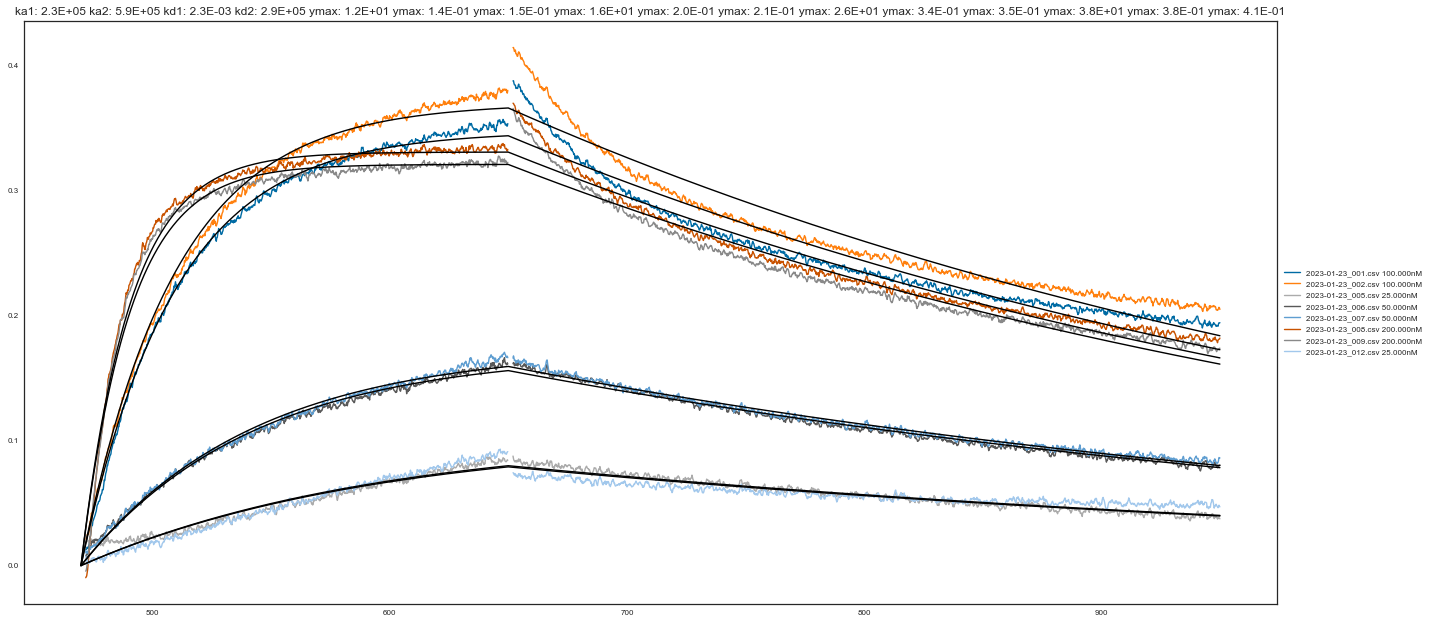

In [490]:
exp.model = Bivalent_ligand()
exp.create_params(offsets=True)
exp.fit_params()
exp.plot(fit=True, correct_offsets=True)

(<Figure size 1440x720 with 1 Axes>, <AxesSubplot:>)

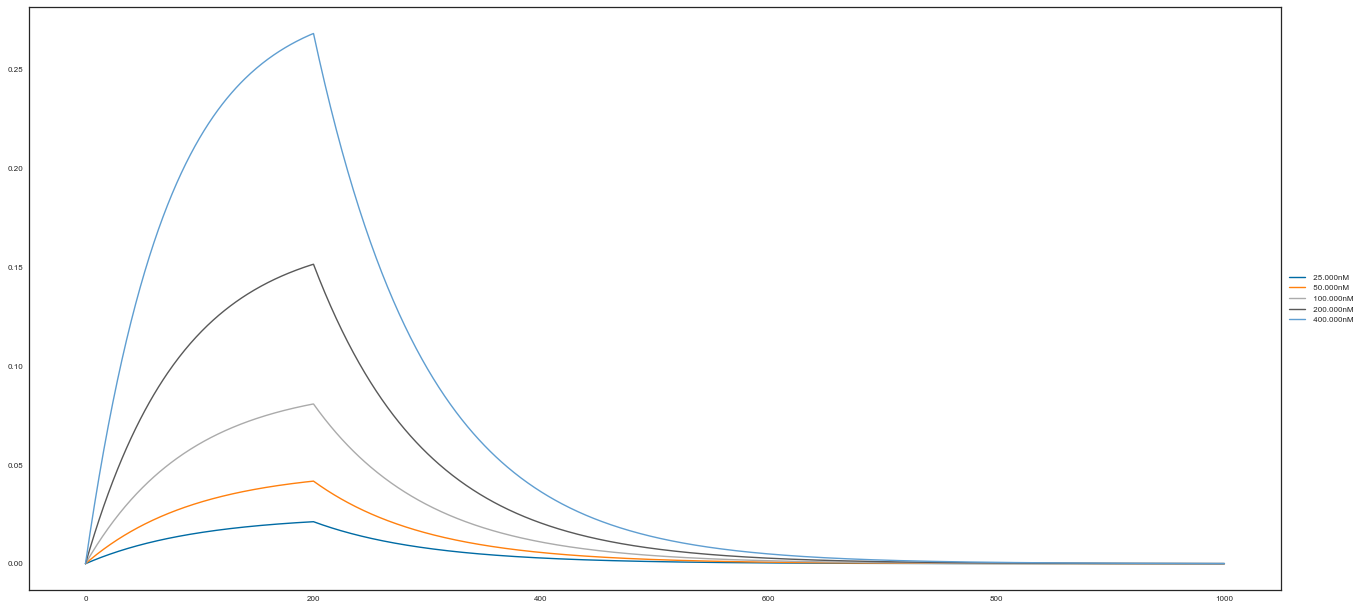

In [492]:
cs = [25, 50, 100, 200, 400]
cs = [c*1e-9 for c in cs]
t=np.linspace(0,1000,1000,endpoint=True)
r = t*0

exp2 = Exp()

for c in cs:
    exp2.add_dataset(t, r)
    exp2.datasets[-1].add_step(0,200,c)
    exp2.datasets[-1].add_step(200,1000,0)

exp2.model = Bivalent_ligand()
exp2.create_params() 

exp2.simulate_response()
exp2.plot()

Nan and inf are not valid responses. Some values in dataset 0 are not finite. LMFIT is set to omit.
Nan and inf are not valid responses. Some values in dataset 1 are not finite. LMFIT is set to omit.
Dataset 2 will be ommited. It does not contain any step with concentration>0.
Nan and inf are not valid responses. Some values in dataset 2 are not finite. LMFIT is set to omit.
Dataset 3 will be ommited. It does not contain any step with concentration>0.
Nan and inf are not valid responses. Some values in dataset 3 are not finite. LMFIT is set to omit.
Nan and inf are not valid responses. Some values in dataset 4 are not finite. LMFIT is set to omit.
Nan and inf are not valid responses. Some values in dataset 5 are not finite. LMFIT is set to omit.
Nan and inf are not valid responses. Some values in dataset 6 are not finite. LMFIT is set to omit.
Nan and inf are not valid responses. Some values in dataset 7 are not finite. LMFIT is set to omit.
Nan and inf are not valid responses. Some va

(<Figure size 1440x720 with 1 Axes>,
 <AxesSubplot:title={'center':'ka1: 2.4E+05 ka2: 1.5E+02 ka3: 9.7E+04 kd1: 3.1E-03 kd2: 1.9E-02 kd3: 6.1E+02 ymax: 1.0E+00 ymax: 1.6E-01 ymax: 2.0E-01 ymax: 2.1E-01 ymax: 3.3E-01 ymax: 3.5E-01 ymax: 3.6E-01 ymax: 3.7E-01 ymax: 9.0E-02'}>)

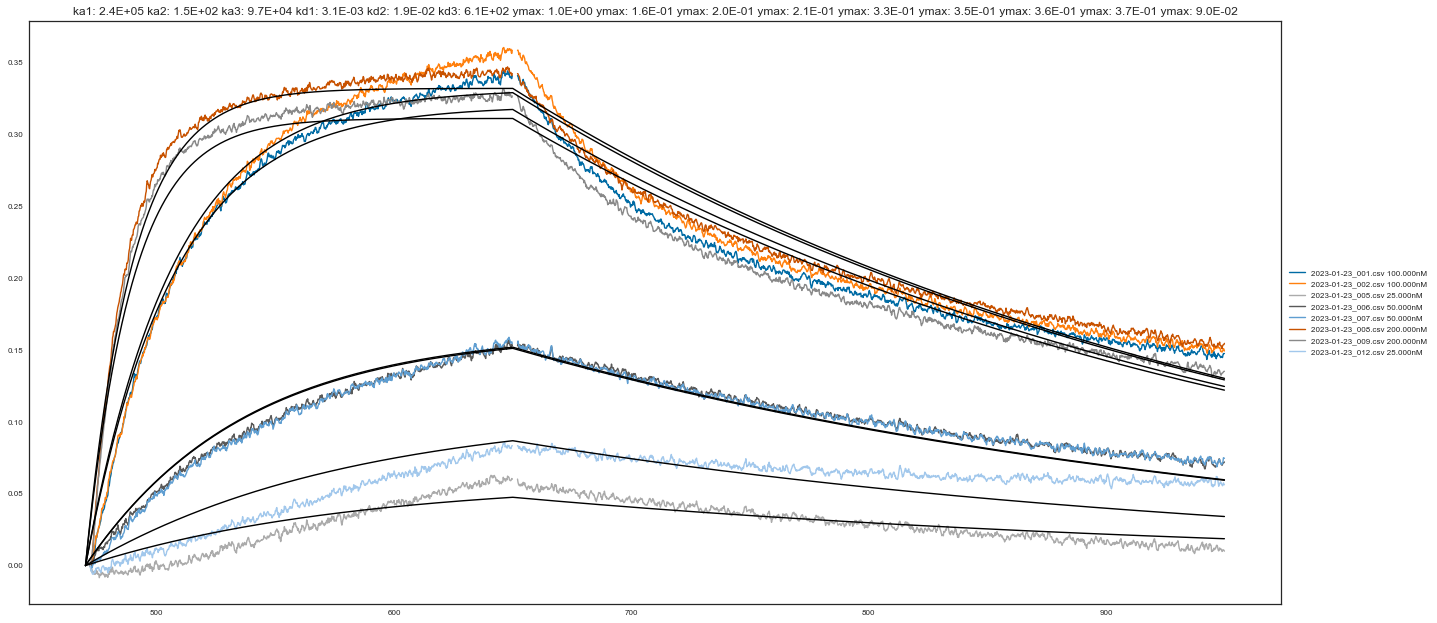

In [477]:
exp.model = Trivalent_ligand()
exp.params=None
exp.create_params(offsets=0)
exp.fit_params()
exp.plot(fit=True)